In [1]:
import numpy as np
from astropy.table import Table
# had a file that 
#t = Table.read('West_M6_Gaia_votable.vot')
#take table of West et al. 2011 >M5 dwarfs which was matched with Gaia DR2 in Vizier
#West et al. ADS bibcode: 2011AJ....141...97W
t = Table.read('West_Mgtr5_Gaia_votable.vot')


In [2]:
#parameters for target 2MASS J10274572+0629104
plx_target=np.array([10.113119891916195])
gmag_target=np.array([17.782438])
bprp_target=np.array([3.837696])
absmag_target=gmag_target - 5.0*np.log10(100.0/plx_target)


In [3]:
t
#check that the table is there and take a look!



_r,_RAJ2000,_DEJ2000,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RV,e_RV,Teff,AG,E_BP-RP_,Rad,Lum
arcs,deg,deg,deg,mas,deg,mas,,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,e-/s,e-/s,mag,mag,e-/s,e-/s,mag,mag,e-/s,e-/s,mag,mag,mag,km / s,km / s,K,mag,mag,Rsun,Lsun
float64,float64,float64,float64,float64,float64,float64,int64,float64,float32,float64,float32,float64,float32,uint8,float32,float32,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float32,float32,float32,float64
0.425,166.7192217804807,26.9132192165295,166.71927025993,1.3968,26.91312453814,1.2908,3998365654926324736,15.5378,1.4522,10.040,2.640,-21.990,2.310,0,254.1,4.37,19.6758,0.0187,61.25,15.39,20.8837,0.2728,560.8,14.11,17.8900,0.0273,2.9937,--,--,--,--,--,--,--
0.557,170.9212458284935,27.2576630932197,170.92148388654,0.3734,27.25765851968,0.6917,3997706669504776832,7.1252,0.9168,49.151,0.623,-1.062,0.556,0,383.8,1.521,19.2282,0.0043,53.35,15.63,21.0336,0.3180,608,10.52,17.8022,0.0188,3.2314,--,--,--,--,--,--,--
0.700,172.1399699860675,27.4404866699044,172.13967380813,0.7002,27.44037355221,0.8602,4018729396252409600,6.2680,1.0697,-61.050,1.430,-26.273,1.591,0,161.3,1.402,20.1692,0.0094,17.13,5.178,22.2670,0.3282,280,9.011,18.6438,0.0349,3.6232,--,--,--,--,--,--,--
1.014,173.0110823416390,27.4266234799646,173.01148752661,0.2253,27.42639549268,0.3003,4018762351536120832,6.9874,0.3709,83.530,0.432,-52.952,0.408,0,602.7,1.681,18.7381,0.0030,66.62,10.86,20.7923,0.1769,931.3,9.461,17.3392,0.0110,3.4531,--,--,--,--,--,--,--
2.125,215.9274902942996,21.4445426581156,215.92768961906,0.5622,21.44370970856,0.5672,1240695453427854848,14.1788,0.7903,43.090,1.642,-193.459,1.194,0,145,1.009,20.2849,0.0076,48.52,18.27,21.1366,0.4088,275.2,6.215,18.6627,0.0245,2.4739,--,--,--,--,--,--,--
0.463,357.0724952971113,0.5178603067429,357.07267624336,0.5042,0.51788599318,0.3412,2643129887640180352,3.1954,0.5773,42.025,1.079,5.966,0.609,0,292.9,1.067,19.5215,0.0040,45.7,5.264,21.2017,0.1251,441.9,6.861,18.1487,0.0169,3.0529,--,--,--,--,--,--,--
0.152,182.6574693778911,28.0829599746591,182.65745972853,0.2213,28.08301268642,0.1744,4012794919680029312,5.5927,0.2719,-1.977,0.445,12.243,0.365,0,669,1.374,18.6248,0.0022,86.94,8.353,20.5034,0.1043,1017,9.494,17.2439,0.0101,3.2594,--,--,--,--,--,--,--
1.016,5.5775244871493,0.4835762998177,5.57788104426,0.2481,0.48362470165,0.1819,2546818196670323968,4.5630,0.3020,82.810,0.711,11.242,0.415,0,817.1,1.726,18.4077,0.0023,120.2,9.328,20.1519,0.0843,1273,8.421,17.0002,0.0072,3.1518,--,--,--,--,--,--,--


In [4]:
#calculate HR diagram stuff. These are all high S/N and biases not particularly important so
# we can use simple method.
MG=t['Gmag']-5.0*np.log10(100.0/t['Plx'])
bprp=t['BP-RP']


In [5]:
import matplotlib.pyplot as plt
#
plt.plot(bprp,MG,'k.',bprp_target,absmag_target,'ro')
plt.gca().invert_yaxis()
plt.show()
# simple plot to see data, but don't use this. Note you can see the colors becoming bad for faint
# sources.

In [6]:
H, xbins, ybins = np.histogram2d(bprp, MG,
                                 bins=(np.linspace(3.0, 5.0, 30),
                                       np.linspace(11, 15, 25)))
cmap = plt.cm.binary
cmap.set_bad('w', 1.)
#see http://www.astroml.org/book_figures/chapter1/fig_S82_hess.html


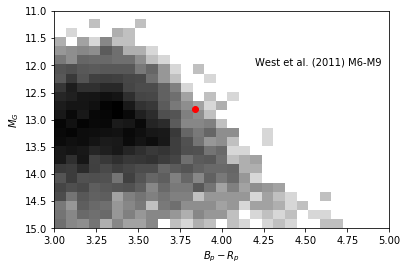

In [7]:
plt.figure()
H[H == 0] = 1  # prevent warnings in log10
plt.imshow(np.log10(H).T, origin='lower',
          extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]],
          cmap=cmap, interpolation='nearest',
          aspect='auto')
plt.plot(bprp_target,absmag_target,'ro')
plt.gca().invert_yaxis()
plt.xlabel('$B_p-R_p$')
plt.ylabel('$M_G$')
plt.text(4.20,12.0,'West et al. (2011) M6-M9')
plt.savefig('hr_2M1027.pdf')
